# Rock Paper Scissors : Policy Improvment Using Policy Gradient

In [ ]:
import numpy as np
import random
from matplotlib import pyplot as plt

from policy import policy_improvement
from game import play_tictactoe

We start the policy such that all actions are equally probable. We expect to lose as many as we win.

$
\theta =
\begin{bmatrix}
1 & 1 & 1 \\
1 & 1 & 1 \\
1 & 1 & 1 \\
\end{bmatrix}
$

If we know what the opponent is going to play, we can improve the policy and win more games.

In [127]:
# The opponent always plays what we think they will play
P = np.array([[1, 0, 0], [0, 1, 0], [0, 0, 1]])
# Equally think the opponent will draw rock, paper or scissors
d = np.array([1 / 3, 1 / 3, 1 / 3, 0, 0, 0])
# Equally likely to choose an action of rock, paper or scissors
theta = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]], dtype=float)

itheta = policy_improvement(1.0, 10, theta, P, d)
print(itheta)

[[0.74036282 2.11404429 0.14559289]
 [0.14559289 0.74036282 2.11404429]
 [2.11404429 0.14559289 0.74036282]]


In [128]:
# Play game with new and old policy
random.seed(0)
reward = play_tictactoe(P, theta, d, 100)
print(reward)
ireward = play_tictactoe(P, itheta, d, 100)
print(ireward)

6
56


Now with policy improvement, we start with winning 6 more than lost and then improve to 56.

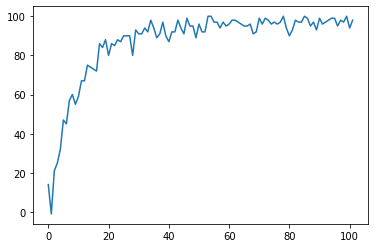

In [140]:
reward_history = []
reward_history.append(play_tictactoe(P, theta, d, 100))
itheta = policy_improvement(1.0, 1, theta, P, d)
reward = play_tictactoe(P, itheta, d, 100)
reward_history.append(reward)

for i in range(100):
    itheta = policy_improvement(1.0, 1, itheta, P, d)
    reward = play_tictactoe(P, itheta, d, 100)
    reward_history.append(reward)

plt.plot(reward_history)
plt.show()

The above graph shows us improve to close to 100 which is always winning.

With enough iteration and large enough value of $\alpha$, this happens.

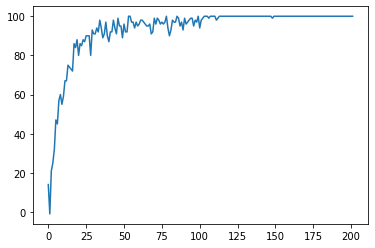

In [141]:
reward_history_long = reward_history.copy()

for i in range(100):
    itheta = policy_improvement(10.0, 10, itheta, P, d)
    reward = play_tictactoe(P, itheta, d, 100)
    reward_history.append(reward)

plt.plot(reward_history)
plt.show()

Now let us consider the case that we can predict 80% of the time what the player is going to play. So, our transition
probability matrix looks like the following

$
P =
\begin{bmatrix}
0.8 & 0.1 & 0.1 \\
0.1 & 0.8 & 0.1 \\
0.1 & 0.1 & 0.8 \\
\end{bmatrix}
$

Now, let us apply policy improvement. Out of the 100 games we play, we should win about 80 more than we lose.

In [142]:
# The opponent always plays what we think they will play
P = np.array([[0.8, 0.1, 0.1], [0.1, 0.8, 0.1], [0.1, 0.1, 0.8]])
# Equally think the opponent will draw rock, paper or scissors
d = np.array([1 / 3, 1 / 3, 1 / 3, 0, 0, 0])
# Equally likely to choose an action of rock, paper or scissors
theta = np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]], dtype=float)

itheta = policy_improvement(1.0, 10, theta, P, d)
print(itheta)

[[0.84967467 1.80639053 0.3439348 ]
 [0.3439348  0.84967467 1.80639053]
 [1.80639053 0.3439348  0.84967467]]


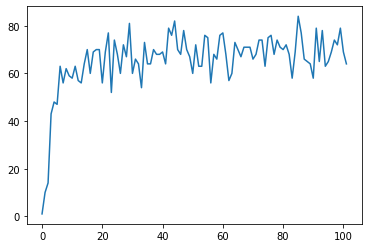

In [145]:
reward_history = []
reward_history.append(play_tictactoe(P, theta, d, 100))
itheta = policy_improvement(1.0, 1, theta, P, d)
reward = play_tictactoe(P, itheta, d, 100)
reward_history.append(reward)

for i in range(100):
    itheta = policy_improvement(1.0, 5, itheta, P, d)
    reward = play_tictactoe(P, itheta, d, 100)
    reward_history.append(reward)

plt.plot(reward_history)
plt.show()

